# Análise exploratória dos Microdados do ENADE

## Alunos:
    - Berly Joaquin
    - Leonardo Lopes

## Objetivos

O objetivo deste trabalho é analisar a série histórica do perfil dos participantes que realizaram a prova do ENADE. O foco será nas informações econômicas, como renda e outros fatores econômicos.

## Bibliotecas Utilizadas

Para a análise feita neste trabalho, utilizamos as bibliotecas **Pandas**, **Numpy** e **Matplotlib** da linguagem Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparando os dados

Na etapa da preparação dos dados, foi necessário tratar as informações obtidas nas bases de dados fornecidas.

### Tipos de Informações

* **Ano**: representa ano em que o exame foi realizado e está disponível na base de dados na coluna `nu_ano` sem maior necessidade de tratamentos de dados;
* **Idade**: análoga à informação de ano, está disponível na base de dados de forma amigável na coluna `nu_idade` e não foi necessário tratar estes dados;
* **Renda**: representa a renda da família em número de salários mínimos (independente do ano do exame), foi o tipo de dado que apresentou maiores dificuldades no seu tratamento, uma vez que a informação aparece com diferetes nomes de colunas na base de dados original e seus valores categórios não nos trazem grandes informações de forma imediata. Para tal, transformamos o a informação categórica em dados numéricos (a categoria foi mapeada para seu valor médio)

In [2]:
def clean_data(dataframe, renda, bolsa, dict_renda=None):
    new_dataframe = pd.DataFrame(columns=['ano', 'idade'])
    new_dataframe['ano'] = dataframe['nu_ano']
    new_dataframe['idade'] = dataframe['nu_idade']
    new_dataframe['bolsa'] = dataframe[bolsa].str.lower()
    
    if dict_renda is None:
        dict_renda = { 'a': 1.5, 'b': 2.25, 'c': 3.75, 'd': 5.25, 'e': 8.0, 'f': 15.0, 'g': 30.0 }
    
    r = dataframe[renda].str.lower()
    
    new_dataframe['renda'] = r.map(dict_renda)
    

    return new_dataframe

### Obtendo os dados

Os dados da base de dados foram obtidos a partir do arquivo .csv de cada ano

In [3]:
dict_renda_2011 = { 'b': 1.5, 'c': 2.25, 'd': 3.75, 'e': 5.25, 'f': 8.0, 'g': 15.0, 'h': 30.0 }

df10 = clean_data(pd.read_csv('microdados_enade_2010.csv', encoding='latin1', delimiter=';'), 'QE_I5', 'QE_I10')
df11 = clean_data(pd.read_csv('microdados_enade_2011.csv', encoding='latin1', delimiter=';'), 'co_rs_s5','co_rs_s10', dict_renda_2011)
df12 = clean_data(pd.read_csv('microdados_enade_2012.csv' ,encoding='latin1', delimiter=';'), 'qe_i5', 'qe_i10')
df13 = clean_data(pd.read_csv('microdados_enade_2013.csv', delimiter=';'), 'co_rs_s7', 'co_rs_s10' )
df14 = clean_data(pd.read_csv('microdados_enade_2014.csv', delimiter=';', low_memory=False),  'qe_i8', 'qe_i11')

dfs = [df10, df11, df12, df13, df14]

In [4]:
df = pd.DataFrame()

df = df.append(dfs)

pd.options.display.float_format = '{:.2f}'.format

df.describe()

,ano,idade,renda
count,2065002.00,2065002.00,1623011.00
mean,2011.97,28.86,7.19
std,1.42,8.20,7.13
min,2010.00,14.00,1.50
25%,2011.00,23.00,2.25
50%,2012.00,26.00,5.25
75%,2013.00,33.00,8.00
max,2014.00,100.00,30.00


In [5]:
df.renda.unique()

array([ 15.  ,   3.75,   8.  ,    nan,  30.  ,   5.25,   1.5 ,   2.25])

### Visualizando a Distribuição dos Dados

Para melhorar a visualização dos dados, montamos um bloxplot com os dados da renda dos candidatos do ENADE.

Analisando os últimos 5 anos da base, foi possível notar que no ano de 2012 houve um pico nos dados de renda e seus valores estao acima dos dados dos outros anos.

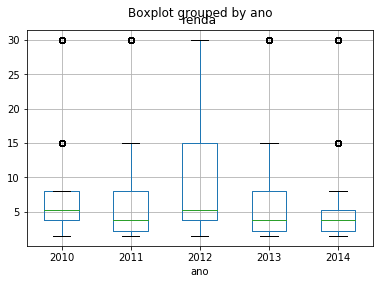

In [6]:
%matplotlib inline
df.boxplot(column='renda', by='ano')

Além disso, montamos um histogrma-para a visualização destes dados de outra forma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8d523c080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8da9959b0>]], dtype=object)

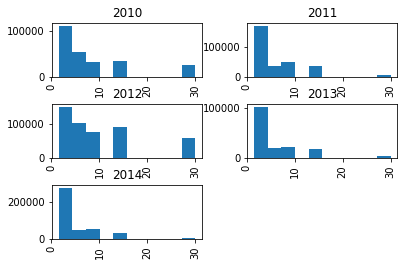

In [7]:
%matplotlib inline
df['renda'].hist(by=df['ano'])

Agora vamos a distribuição univariada do dado tipo de bolsa, ao ser um dado categórico faremos uma análise de barra de caracteres.
Primeiro iremos definir os dicionários que utilizaremos para esta análise

In [8]:
#dict_bolsa_10_11_12  Esta variable servirá como diccionario para los años 2010, 2011 y 2012   
dict_bolsa_10_11_12 = {'a': 'ProUni Integral', 
                       'b': 'ProUni Parcial', 
                       'c': 'FIES', 
                       'd':'ProUni Parcial e FIES',
                       'e':'Otra do estado', 
                       'f':'Ofrecida pela própia instituição de ensino', 
                       'g': 'Empresa, ONG, etc', 
                       'h':'Financiamiento pela própia institução de ensino', 
                       'i':'Financiamento pelo banco privado, etc', 
                       'j':'Mais de um dos tipos de bolsa ou financiamento citados'}

# dict_bolsa_13_14 Esta variable servirá como diccionario para los años 2013 y 2014

dict_bolsa_13_14={'a': 'Nenhum, pois meu curso é gratuito',
                  'b':'Nenhum, embora meu curso não seja gratuito',
                  'c':'ProUni integral', 
                  'd':'ProUni parcial, apenas',
                  'e':'FIES, apenas', 'f': 'ProUni Parcial e FIES',
                  'g':'Bolsa oferecida por governo estadual, distrital ou municipal', 
                  'h' :'Bolsa oferecida pela própria instituição', 
                  'i':'Bolsa oferecida por outra entidade (empresa, ONG, outra)', 
                  'j' : 'Financiamento oferecido pela própria instituição',
                  'k': 'Financiamento bancário'}


Uma vez criada as variáveis passaremos a mapear cada DataFrame.

In [9]:
# Mapeo para el ano 2010
p10=df10['bolsa'].str.lower()
df10['bolsa']=p10.map(dict_bolsa_10_11_12)

# Mapeo para el ano 2011
p11=df11['bolsa'].str.lower()
df11['bolsa']=p11.map(dict_bolsa_10_11_12)

# Mapeo para el ano 2012
p12=df12['bolsa'].str.lower()
df12['bolsa']=p12.map(dict_bolsa_10_11_12)

# Mapeo para el ano 2013
p13=df13['bolsa'].str.lower()
df13['bolsa']=p13.map(dict_bolsa_13_14)

# Mapeo para el ano 2014
p14=df14['bolsa'].str.lower()
df14['bolsa']=p14.map(dict_bolsa_13_14)




Agora vamos plotar um grafico de barras de caracter para observar a distribuição do tipo de carteira pela cada ano.

In [10]:

#------------------------------------- ANO 2010 --------------------------------------------------

df10_tot=df10['bolsa'].value_counts(ascending=True)
df10_tot


ProUni Parcial e FIES                                       817
Mais de um dos tipos de bolsa ou financiamento citados     1125
Financiamento pelo banco privado, etc                      1354
Financiamiento pela própia institução de ensino            4730
ProUni Parcial                                             5110
Empresa, ONG, etc                                          5501
Otra do estado                                            10404
ProUni Integral                                           14003
FIES                                                      15725
Ofrecida pela própia instituição de ensino                22727
Name: bolsa, dtype: int64

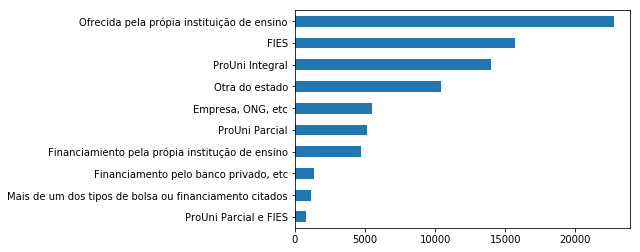

In [11]:
df10_tot.plot.barh()

In [12]:

#------------------------------------------ ANO 2011---------------------------------------------------

df11_tot=df11['bolsa'].value_counts(ascending=True)
df11_tot

ProUni Parcial e FIES                                       396
Financiamento pelo banco privado, etc                      1345
Mais de um dos tipos de bolsa ou financiamento citados     1512
Financiamiento pela própia institução de ensino            4011
ProUni Parcial                                             5285
FIES                                                       5917
Empresa, ONG, etc                                          7033
ProUni Integral                                           13241
Otra do estado                                            14885
Ofrecida pela própia instituição de ensino                21684
Name: bolsa, dtype: int64

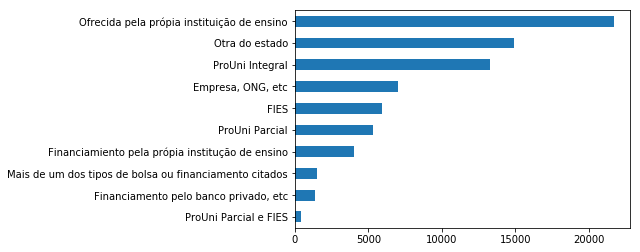

In [13]:
df11_tot.plot.barh()

In [14]:

#------------------------------------------ ANO 2012---------------------------------------------------

df12_tot=df12['bolsa'].value_counts(ascending=True)
df12_tot


ProUni Parcial e FIES                                      1674
Mais de um dos tipos de bolsa ou financiamento citados     2798
Financiamento pelo banco privado, etc                      2995
Financiamiento pela própia institução de ensino            6469
ProUni Parcial                                            13661
Empresa, ONG, etc                                         18174
Otra do estado                                            18247
FIES                                                      18601
ProUni Integral                                           32203
Ofrecida pela própia instituição de ensino                43954
Name: bolsa, dtype: int64

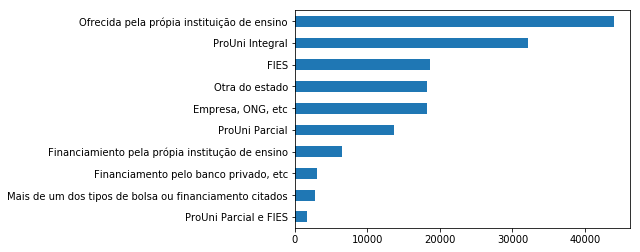

In [15]:
df12_tot.plot.barh()

In [16]:

#------------------------------------------ ANO 2013---------------------------------------------------

def13_tot=df13['bolsa'].value_counts(ascending=True)
def13_tot


Financiamento bancário                                           1346
ProUni Parcial e FIES                                            1473
Financiamento oferecido pela própria instituição                 2731
ProUni parcial, apenas                                           3183
Bolsa oferecida por outra entidade (empresa, ONG, outra)         3835
Bolsa oferecida por governo estadual, distrital ou municipal     5406
ProUni integral                                                  9026
Bolsa oferecida pela própria instituição                        15877
FIES, apenas                                                    18219
Nenhum, pois meu curso é gratuito                               35083
Nenhum, embora meu curso não seja gratuito                      71392
Name: bolsa, dtype: int64

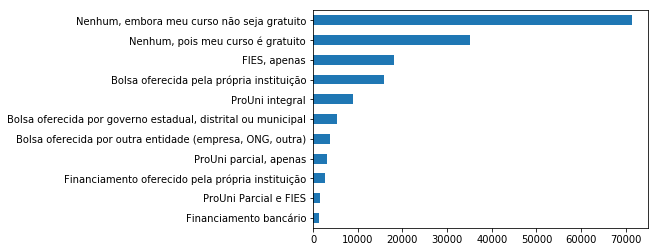

In [17]:
def13_tot.plot.barh()

In [18]:

#------------------------------------------ ANO 2014---------------------------------------------------

def14_tot=df14['bolsa'].value_counts(ascending=True)
def14_tot


Financiamento bancário                                            2172
ProUni Parcial e FIES                                             2949
Financiamento oferecido pela própria instituição                  4722
ProUni parcial, apenas                                            6676
Bolsa oferecida por outra entidade (empresa, ONG, outra)          9196
Bolsa oferecida por governo estadual, distrital ou municipal     15785
ProUni integral                                                  19970
Bolsa oferecida pela própria instituição                         31647
FIES, apenas                                                     33658
Nenhum, embora meu curso não seja gratuito                      143964
Nenhum, pois meu curso é gratuito                               147404
Name: bolsa, dtype: int64

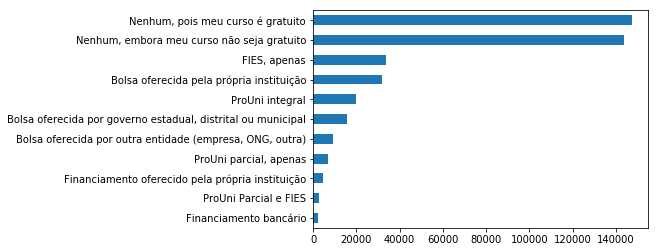

In [19]:
def14_tot.plot.barh()

### Análise Bivariada

Agora vamos fazer uma análise Bivariada a nível descritivo e visual entre as variáveis renda e tipo de bolsa.

In [20]:

#------------------------------------------ ANO 2010---------------------------------------------------

bi10=pd.crosstab(df10['bolsa'], df10['renda'])
bi10

renda,1.5,2.25,3.75,5.25,8.0,15.0,30.0
bolsa,,,,,,,
"Empresa, ONG, etc",108,403,1651,1403,856,753,298
FIES,1076,1167,4037,3505,2124,2131,1463
"Financiamento pelo banco privado, etc",55,121,371,294,234,178,88
Financiamiento pela própia institução de ensino,195,467,1527,1058,619,547,268
Mais de um dos tipos de bolsa ou financiamento citados,53,124,357,236,149,129,69
Ofrecida pela própia instituição de ensino,689,2318,7253,5229,2935,2646,1438
Otra do estado,328,1563,4049,2280,1043,752,339
ProUni Integral,752,2996,6252,2836,819,307,30
ProUni Parcial,158,696,2149,1234,513,306,48


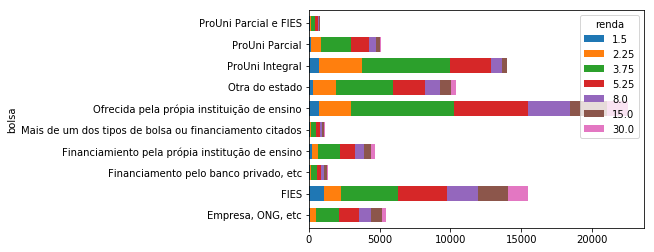

In [21]:
bi10.plot.barh(stacked=True, width=0.7, grid=False)

In [22]:

#------------------------------------------ ANO 2011---------------------------------------------------

bi11=pd.crosstab(df11['bolsa'], df11['renda'])
bi11

renda,1.5,2.25,3.75,5.25,8.0,15.0,30.0
bolsa,,,,,,,
"Empresa, ONG, etc",318,1234,1316,1070,1733,1147,95
FIES,375,1288,1321,893,1227,677,35
"Financiamento pelo banco privado, etc",89,262,250,199,298,188,19
Financiamiento pela própia institução de ensino,386,1034,848,486,678,444,48
Mais de um dos tipos de bolsa ou financiamento citados,118,364,327,204,301,151,13
Ofrecida pela própia instituição de ensino,1646,5446,4632,2944,3823,2521,337
Otra do estado,1724,5303,3477,1840,1650,634,47
ProUni Integral,1569,5078,3460,1545,1184,192,3
ProUni Parcial,427,1704,1386,799,709,216,3


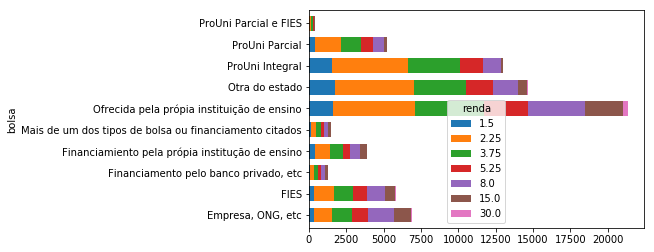

In [23]:
bi11.plot.barh(stacked=True, width=0.7, grid=False)

In [24]:

#------------------------------------------ ANO 2012---------------------------------------------------

bi12=pd.crosstab(df12['bolsa'], df12['renda'])
bi12


renda,1.5,2.25,3.75,5.25,8.0,15.0,30.0
bolsa,,,,,,,
"Empresa, ONG, etc",108,786,3560,4222,3453,4143,1747
FIES,317,1772,5046,4340,3016,2913,1103
"Financiamento pelo banco privado, etc",30,156,565,642,573,654,333
Financiamiento pela própia institução de ensino,99,502,1563,1466,1015,1096,611
Mais de um dos tipos de bolsa ou financiamento citados,45,231,683,657,434,480,231
Ofrecida pela própia instituição de ensino,471,3134,10444,10103,6952,7823,4281
Otra do estado,225,2125,5911,4552,2544,2088,702
ProUni Integral,427,5403,12936,8003,3479,1736,191
ProUni Parcial,139,1361,4714,3763,2095,1380,199


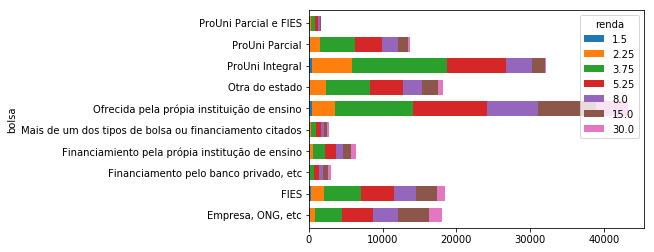

In [25]:
bi12.plot.barh(stacked=True, width=0.7, grid=False)

In [26]:

#------------------------------------------ ANO 2013---------------------------------------------------

bi13=pd.crosstab(df13['bolsa'], df13['renda'])
bi13


renda,1.5,2.25,3.75,5.25,8.0,15.0,30.0
bolsa,,,,,,,
Bolsa oferecida pela própria instituição,2667,4835,3334,2073,1763,1068,118
"Bolsa oferecida por governo estadual, distrital ou municipal",1339,1925,1082,533,335,178,11
"Bolsa oferecida por outra entidade (empresa, ONG, outra)",527,1137,889,543,490,226,21
"FIES, apenas",2840,5062,3542,2425,2343,1765,228
Financiamento bancário,279,375,235,148,151,113,44
Financiamento oferecido pela própria instituição,477,835,515,357,341,187,16
"Nenhum, embora meu curso não seja gratuito",10114,16530,12967,9366,10049,9693,2563
"Nenhum, pois meu curso é gratuito",4670,7807,6159,4784,5684,5121,809
ProUni Parcial e FIES,295,553,335,150,97,37,5


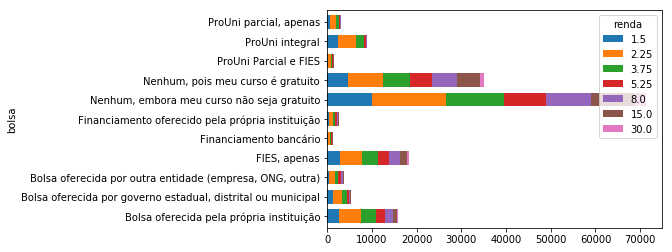

In [27]:
bi13.plot.barh(stacked=True, width=0.7, grid=False)

In [28]:

#------------------------------------------ ANO 2014---------------------------------------------------

bi14=pd.crosstab(df14['bolsa'], df14['renda'])
bi14


renda,1.5,2.25,3.75,5.25,8.0,15.0,30.0
bolsa,,,,,,,
Bolsa oferecida pela própria instituição,5699,9234,6449,4095,3876,2063,231
"Bolsa oferecida por governo estadual, distrital ou municipal",3981,5774,3121,1519,1028,342,20
"Bolsa oferecida por outra entidade (empresa, ONG, outra)",941,1971,1923,1604,1879,831,47
"FIES, apenas",6523,10937,7124,4279,3573,1168,54
Financiamento bancário,514,596,390,276,222,123,51
Financiamento oferecido pela própria instituição,784,1388,968,634,616,309,23
"Nenhum, embora meu curso não seja gratuito",21421,35388,27325,19851,22404,14924,2651
"Nenhum, pois meu curso é gratuito",32121,40971,25776,16561,18067,12008,1900
ProUni Parcial e FIES,541,1040,720,366,228,52,2


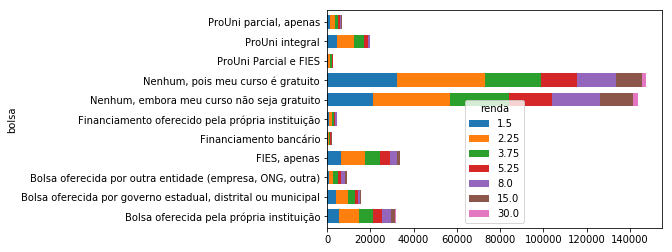

In [29]:
bi14.plot.barh(stacked=True, width=0.7, grid=False)